# 1.Image Classification Using Convolutional Neural Networks (CNN)

## 1.1. Fashion MNIST Dataset Load

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 채널 차원 추가
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


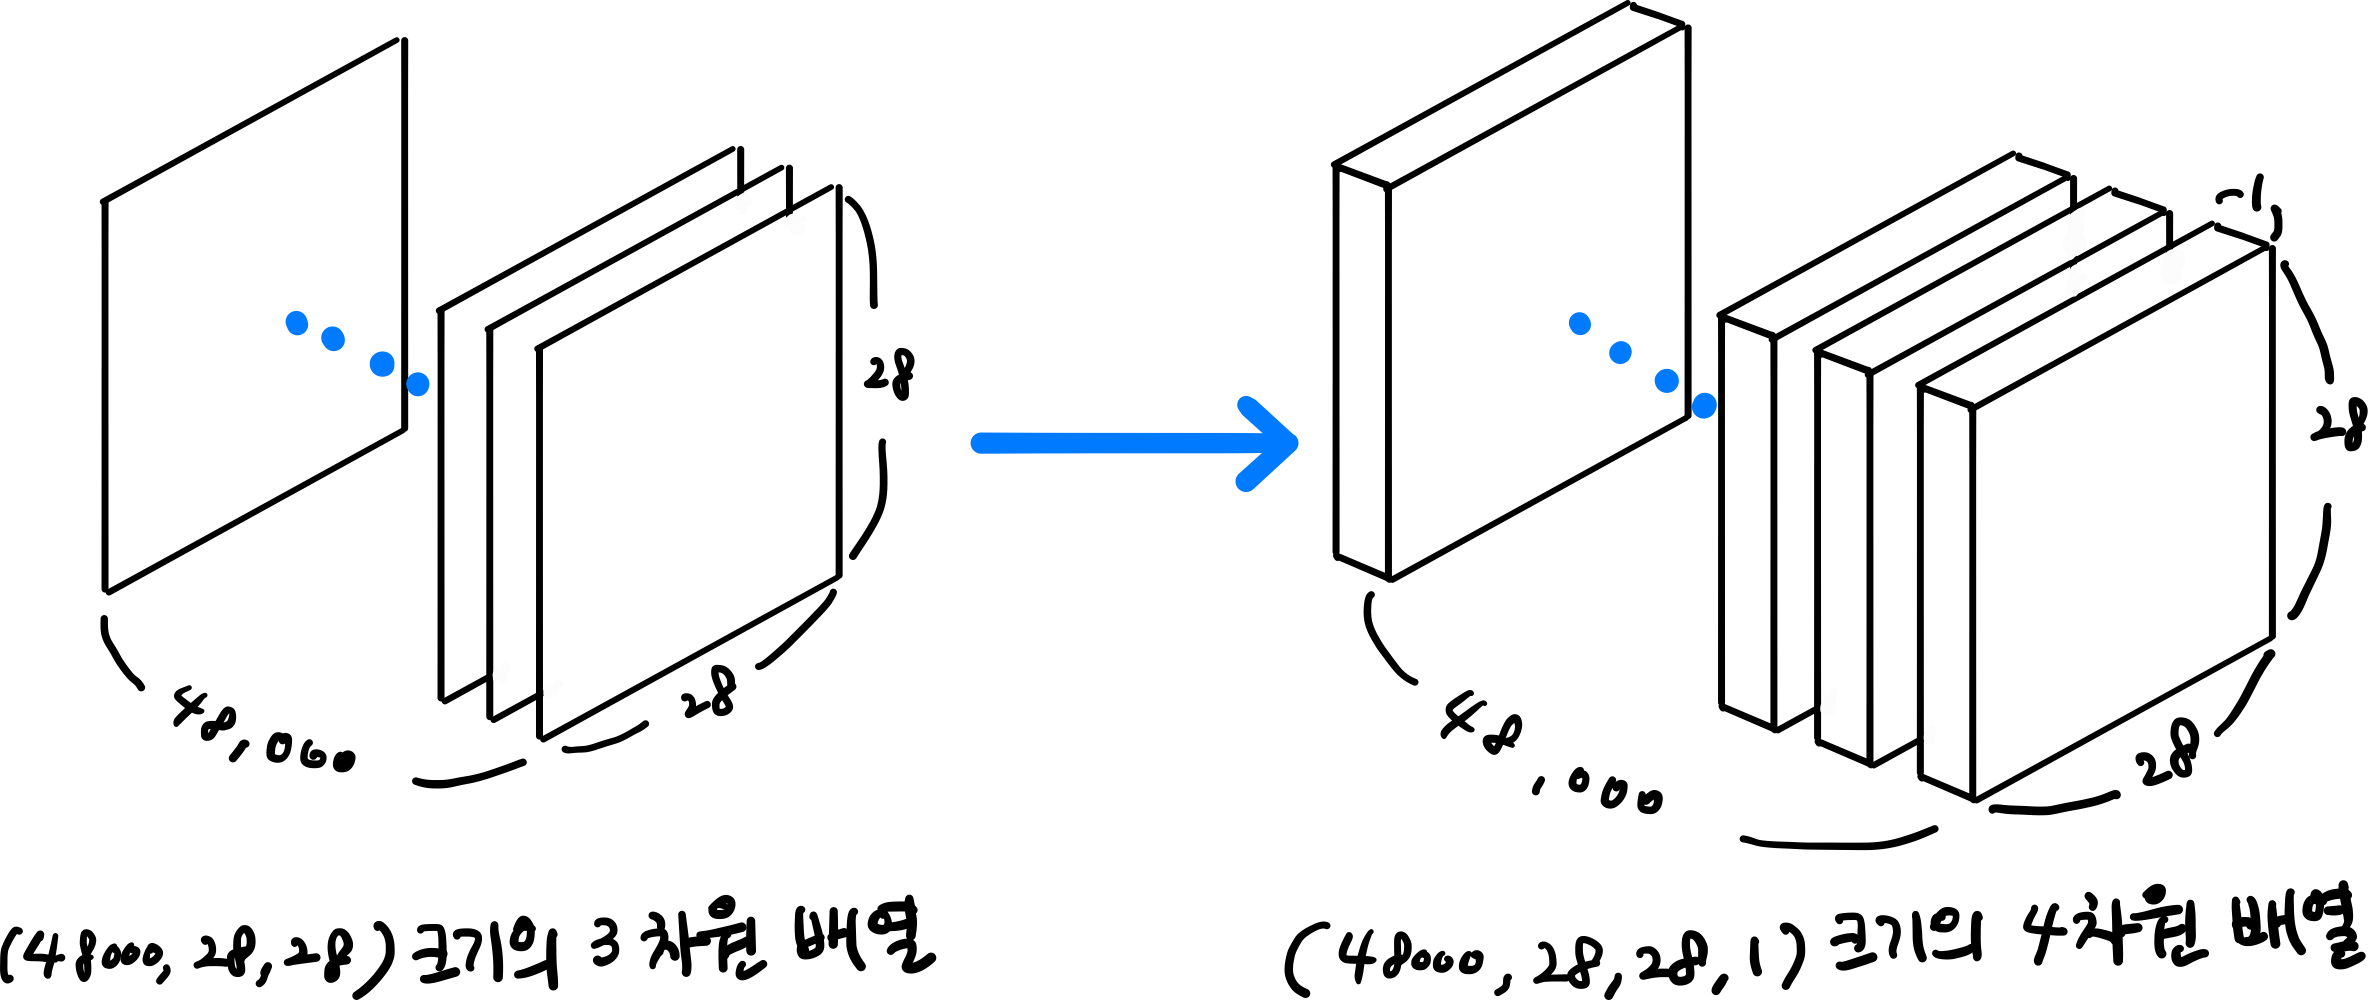

## 1.2. Creating a CNN

In [ ]:
model = keras.Sequential()

In [ ]:
# First convolution layer
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [ ]:
# First pooling layer
model.add(keras.layers.MaxPooling2D(2))

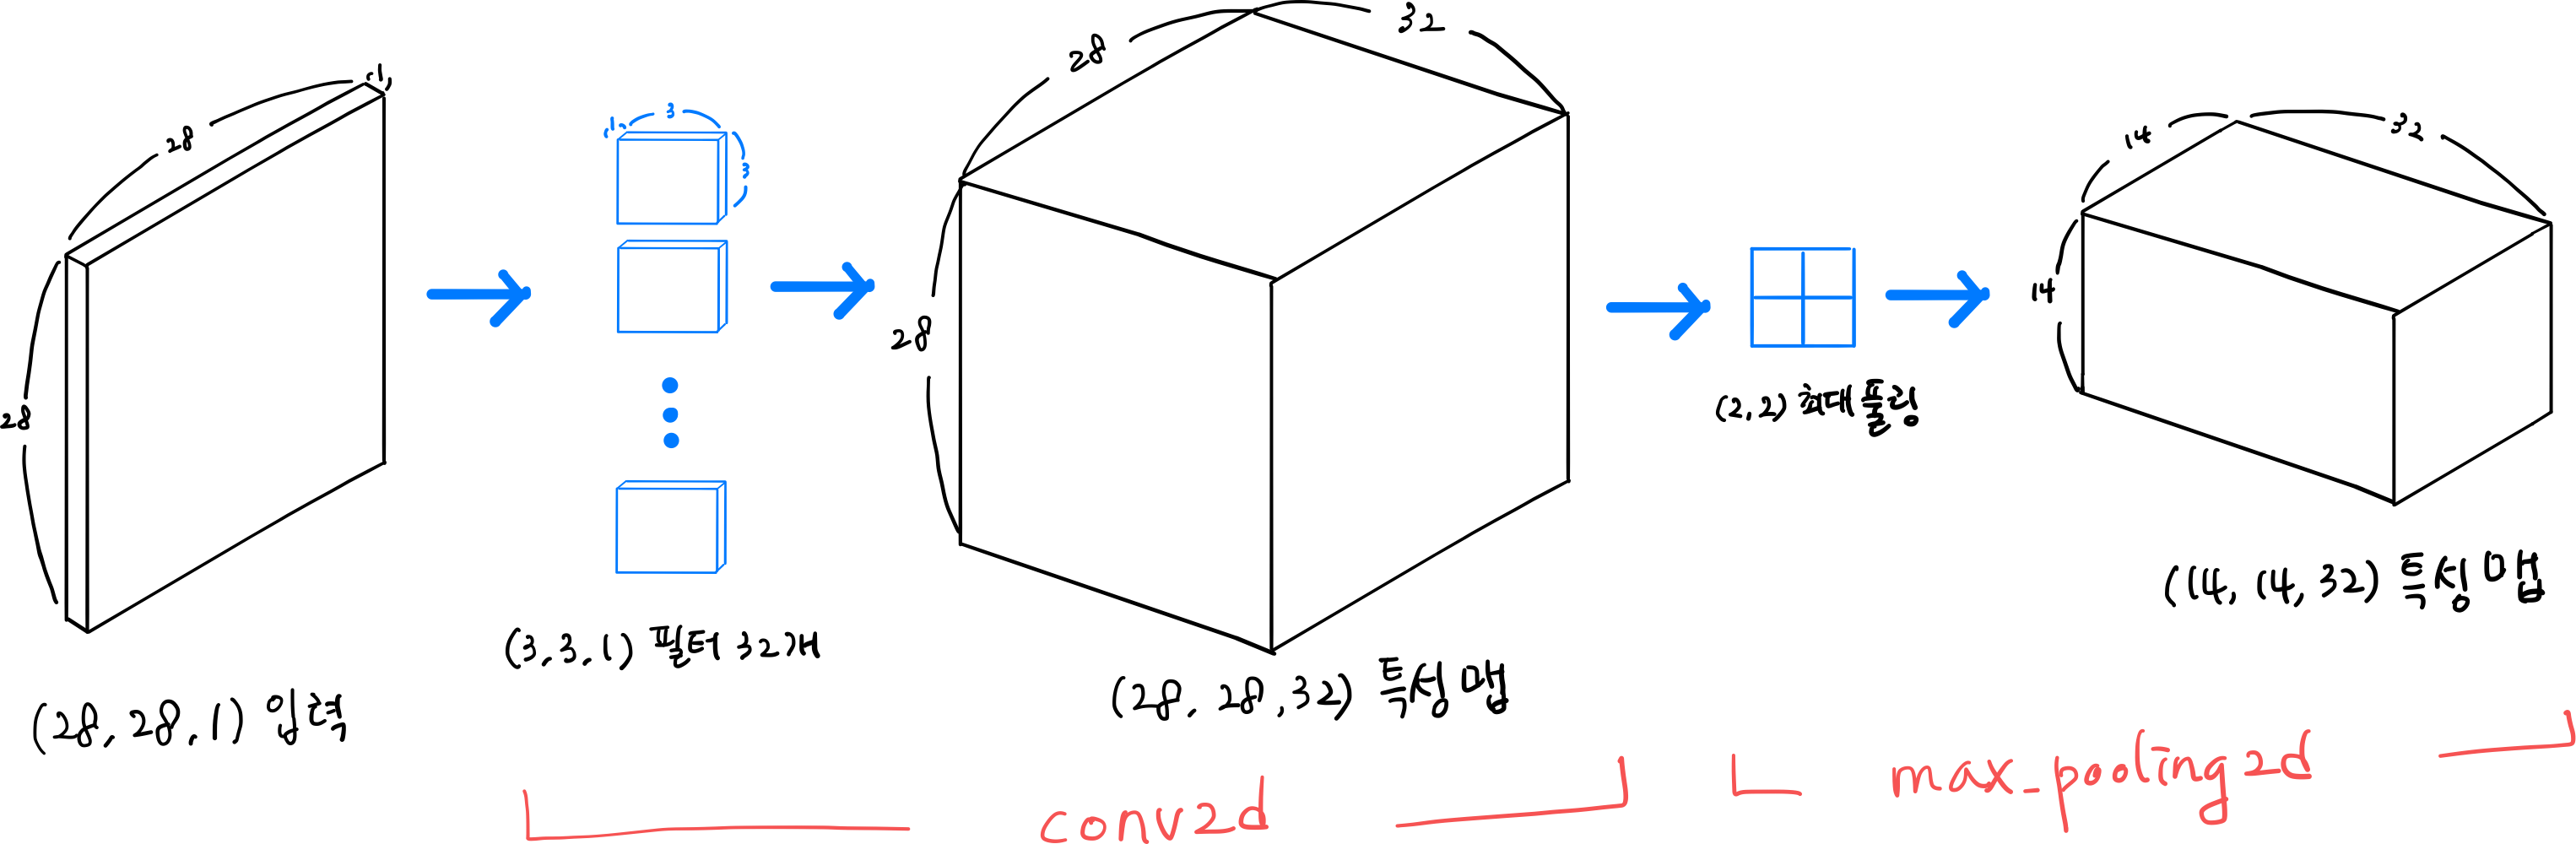

In [ ]:
# Second convolution & pooling layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# Flatten
model.add(keras.layers.Flatten())
# Dense hidden layer
model.add(keras.layers.Dense(100, activation='relu'))
# Dropout layer
model.add(keras.layers.Dropout(0.4))
# Output layer
model.add(keras.layers.Dense(10, activation='softmax'))

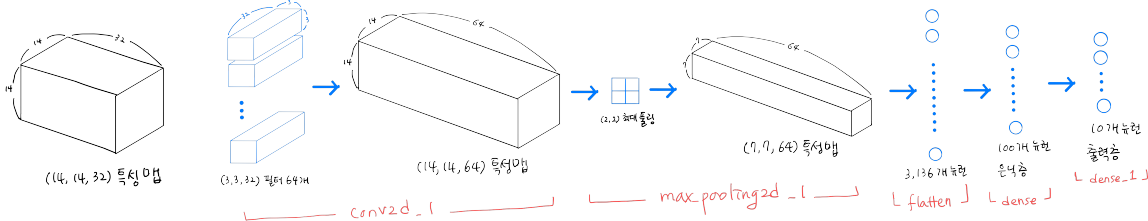

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

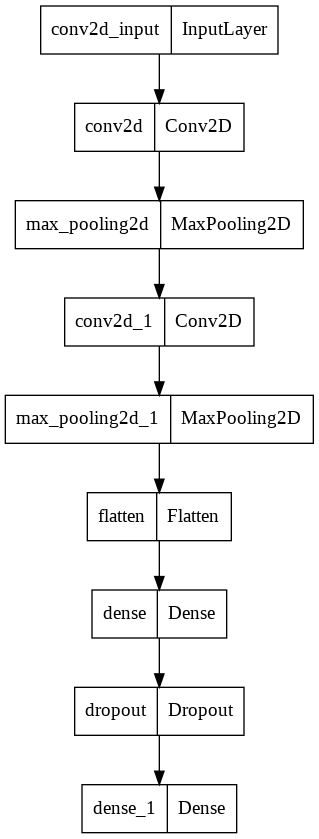

In [ ]:
# layer의 구성을 그림으로 표현
keras.utils.plot_model(model)

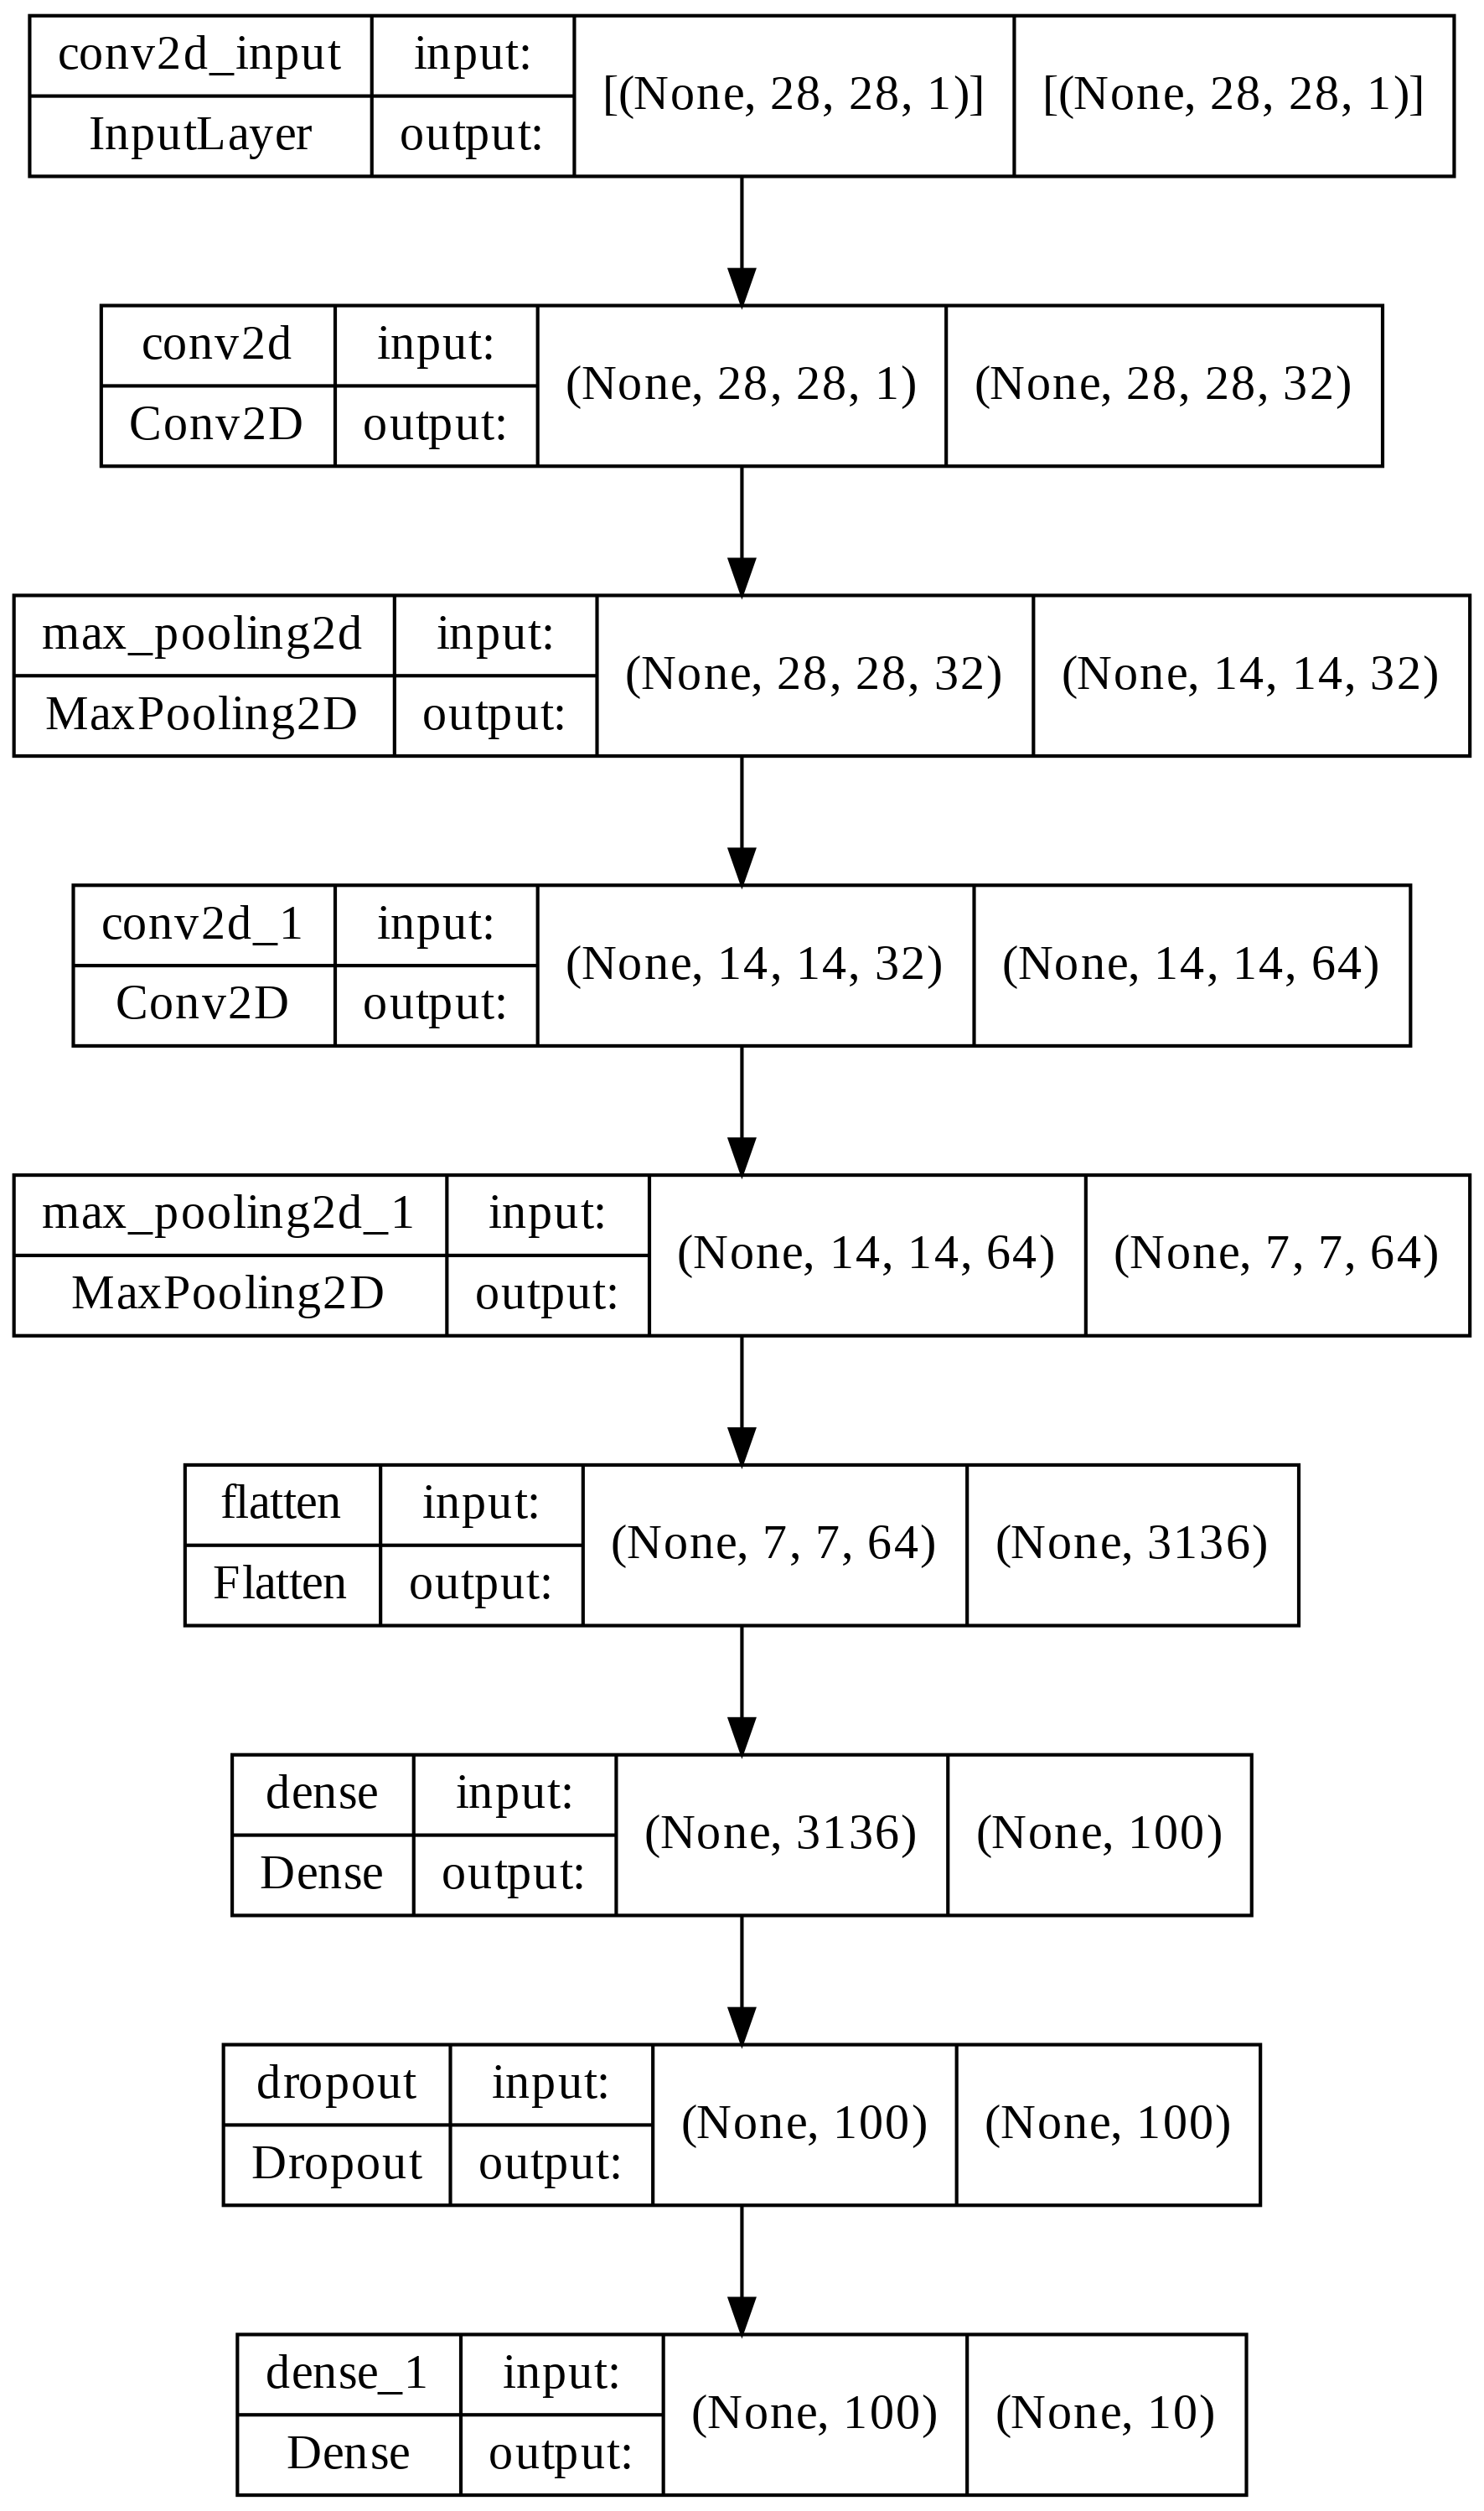

In [ ]:
# 입력과 출력 크기 표시
# to_file = 출력한 이미지를 파일로 저장
# dpi = 해상도
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

## 1.3. Model compile and training

* **Callback** : training 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* **ModelCheckpoint callback** : 에포크마다 모델 저장
    * save_best_only=True : 가장 낮은 validation score를 만드는 모델을 저장
* **Early Stopping** : overfitting이 시작되기 전에 training을 미리 중지하는 것
* **EarlyStopping callback**
    * patience : valdiation score가 향상되지 않더라도 진행할 에포크 횟수
    * restore_best_weights=True : 가장 낮은 validation loss를 낸 모델 파라미터로 되돌림





In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 8ms/step - loss: 0.5226 - accuracy: 0.8130 - val_loss: 0.3416 - val_accuracy: 0.8757
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3506 - accuracy: 0.8748 - val_loss: 0.2900 - val_accuracy: 0.8923
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2996 - accuracy: 0.8914 - val_loss: 0.2617 - val_accuracy: 0.9044
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2692 - accuracy: 0.9036 - val_loss: 0.2437 - val_accuracy: 0.9100
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2449 - accuracy: 0.9106 - val_loss: 0.2356 - val_accuracy: 0.9132
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2272 - accuracy: 0.9164 - val_loss: 0.2363 - val_accuracy: 0.9095
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2082 - accuracy: 0.9239 - val_loss: 0.2204 - val_ac

In [ ]:
import matplotlib.pyplot as plt

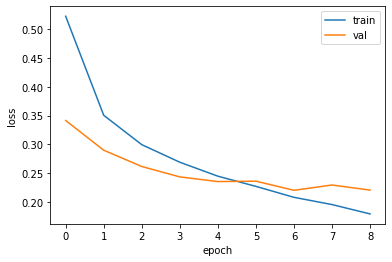

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.9209


[0.22040173411369324, 0.9209166765213013]